# **Importing Libraries**

In [ ]:
#Import Library
import pandas as pd
import numpy as np
from scipy import stats

#Import Data Visualization Library
from empiricaldist import Pmf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Load Data and Filtering Columns**

1.   Read the data
2.   Filtering for only needed Columns
3.   Filtering to Only Shows Existing Customer in Attrition_Flag
4.   Filtering to Only Shows Attrited Customer in Attrition_Flag

In [ ]:
#1. Read the data
cc = pd.read_csv('/content/drive/MyDrive/Digital Skola/BankChurners.csv')

In [ ]:
#2. Filtering for only needed Columns
cc_filt = cc.filter(items = ['Attrition_Flag', 'Total_Trans_Amt', 'Total_Trans_Ct'])

print(cc_filt.shape)
cc_filt.head()

(10127, 3)


,Attrition_Flag,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,1144,42
1,Existing Customer,1291,33
2,Existing Customer,1887,20
3,Existing Customer,1171,20
4,Existing Customer,816,28


Attrition_Flag : Internal event for Existing and Attrited Customer (customer activity)

Total_Trans_Amt : Total Transaction Amount (Last 12 months)

Total_Trans_Ct : Total Transaction Count (Last 12 months)

**There are total 10,127 rows.**

In [ ]:
#3. Filtering to Only Shows Existing Customer in Attrition_Flag
cc_ext_cust = cc_filt.loc[cc_filt['Attrition_Flag'] == 'Existing Customer']

print(cc_ext_cust.shape)
cc_ext_cust.head()

(8500, 3)


,Attrition_Flag,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,1144,42
1,Existing Customer,1291,33
2,Existing Customer,1887,20
3,Existing Customer,1171,20
4,Existing Customer,816,28


**There are total 8,500 rows.**

In [ ]:
#4. Filtering to Only Shows Attrited Customer in Attrition_Flag
cc_att_cust = cc_filt.loc[cc_filt['Attrition_Flag'] == 'Attrited Customer']

print(cc_att_cust.shape)
cc_att_cust.head()

(1627, 3)


,Attrition_Flag,Total_Trans_Amt,Total_Trans_Ct
21,Attrited Customer,692,16
39,Attrited Customer,704,16
51,Attrited Customer,705,19
54,Attrited Customer,602,15
61,Attrited Customer,691,15


**There are total 1,627 rows.**

# **Find Mean, Median, Mode**

In [ ]:
#Descriptive Statistics for Existing Customer
print(cc_ext_cust.describe().round(2))

       Total_Trans_Amt  Total_Trans_Ct
count          8500.00         8500.00
mean           4654.66           68.67
std            3512.77           22.92
min             816.00           11.00
25%            2384.75           54.00
50%            4100.00           71.00
75%            4781.25           82.00
max           18484.00          139.00


In [ ]:
#Descriptive Statistics for Attrited Customer
print(cc_att_cust.describe().round(2))

       Total_Trans_Amt  Total_Trans_Ct
count          1627.00         1627.00
mean           3095.03           44.93
std            2308.23           14.57
min             510.00           10.00
25%            1903.50           37.00
50%            2329.00           43.00
75%            2772.00           51.00
max           10583.00           94.00


In [ ]:
#Find Mode For 'Total_Trans_Amt' & 'Total_Trans_Ct' In Filtered Table 'cc_ext_cust'
print(stats.mode(cc_ext_cust['Total_Trans_Amt']))
print(stats.mode(cc_ext_cust['Total_Trans_Ct']))

#Find Mode For 'Total_Trans_Amt' & 'Total_Trans_Ct' In Filtered Table 'cc_att_cust'
print(stats.mode(cc_att_cust['Total_Trans_Amt']))
print(stats.mode(cc_att_cust['Total_Trans_Ct']))

ModeResult(mode=array([4253]), count=array([11]))
ModeResult(mode=array([81]), count=array([203]))
ModeResult(mode=array([2108]), count=array([5]))
ModeResult(mode=array([43]), count=array([85]))


Mode Transaction Amount Existing Customer : 4253 (11 times)

Mode Transaction Count Existing Customer : 81 (203 times)

Mode Transaction Amount Attrited Customer : 2108 (5 times)

Mode Transaction Count Attrited Customer : 43 (85 times)

# **PMF Analysis in 'Attrition_Flag' Column**

In [ ]:
PMF_ = Pmf.from_seq(cc_filt['Attrition_Flag'], normalize=True)
PMF_ = pd.DataFrame({'Attrition_Flag' : PMF_.index, 'PMF' : PMF_.values})

px.bar(PMF_, x = 'Attrition_Flag', y = 'PMF', width = 750, height = 500)

Existing Customer = 84%

Attrited Customer = 16%

# **Distribution Analysis and Skewness for Total Transaction Amount and Total Transaction Count**

Skewness:  1.995948155384814


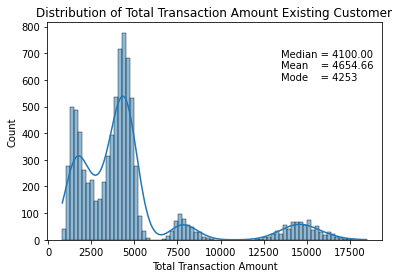

Skewness:  -0.003642152123980986


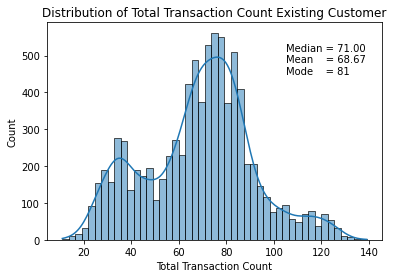

In [ ]:
#Total Transaction Amount Existing Customer
sns.histplot(data=cc_ext_cust['Total_Trans_Amt'], kde=True)

print("Skewness: ", cc_ext_cust['Total_Trans_Amt'].skew())
plt.text(13500, 600, 'Median = 4100.00 \nMean    = 4654.66  \nMode    = 4253', fontsize = 10)
plt.xlabel("Total Transaction Amount")
plt.title("Distribution of Total Transaction Amount Existing Customer")
plt.show()

#Total Transaction Count Existing Customer
sns.histplot(data=cc_ext_cust['Total_Trans_Ct'], kde=True)

print("Skewness: ", cc_ext_cust['Total_Trans_Ct'].skew())
plt.text(105, 450, 'Median = 71.00 \nMean    = 68.67 \nMode    = 81', fontsize = 10)
plt.xlabel("Total Transaction Count")
plt.title("Distribution of Total Transaction Count Existing Customer")
plt.show()

Skewness:  1.685336236708311


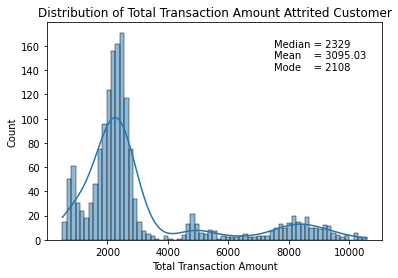

Skewness:  0.4859447964562427


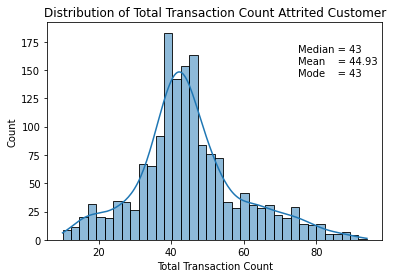

In [ ]:
#Total Transaction Amount Attrited Customer
sns.histplot(data=cc_att_cust['Total_Trans_Amt'], kde=True)

print("Skewness: ", cc_att_cust['Total_Trans_Amt'].skew())
plt.text(7500, 140, 'Median = 2329 \nMean    = 3095.03 \nMode    = 2108', fontsize = 10)
plt.xlabel("Total Transaction Amount")
plt.title("Distribution of Total Transaction Amount Attrited Customer")
plt.show()

#Total Transaction Count Attrited Customer
sns.histplot(data=cc_att_cust['Total_Trans_Ct'], kde=True)

print("Skewness: ", cc_att_cust['Total_Trans_Ct'].skew())
plt.text(75, 145, 'Median = 43 \nMean    = 44.93 \nMode    = 43', fontsize = 10)
plt.xlabel("Total Transaction Count")
plt.title("Distribution of Total Transaction Count Attrited Customer")
plt.show()

# **Correlation Analysis for Total Transaction Amount and Total Transaction Count**

According to analysis, it shows that there is a positive correlation between Total Transaction Amount and Total Transaction Count columns since the result is **0.81**. It indicates that as Total Transaction Count increasing so does the Total Transaction Amount.

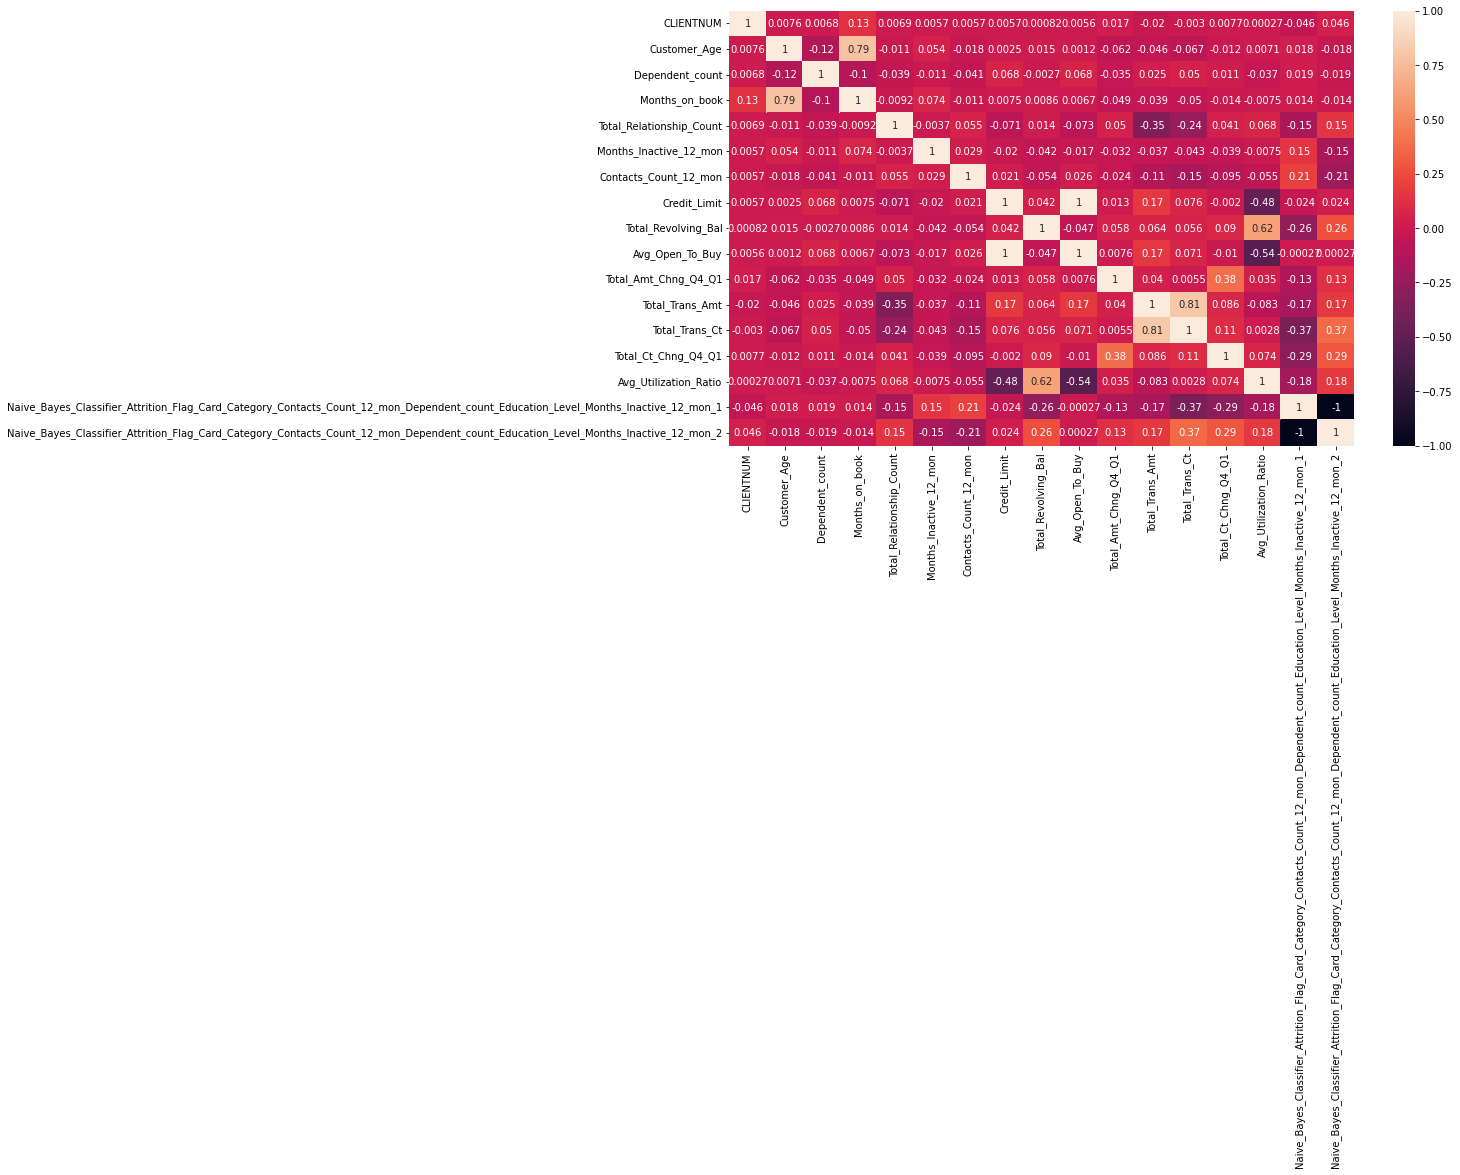

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(cc.corr(), annot=True)
plt.show()